In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df_full = pd.read_csv('pisa2012.csv', encoding='latin-1')

/Users/jackbolshaw/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (15,16,17,21,22,23,24,25,26,30,31,36,37,45,65,123,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,475) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_columns = pd.read_csv('pisadict2012_columns.csv', encoding='latin-1')

In [4]:
df_sample = df_full.sample(n = 1000)

In [5]:
df_sample.dtypes;

# Introduction

This project, part of my Udacity Nanodegree, is designed to showcase my ability to create visualisations using python. I have made use of the Matplotlib and Seaborn libraries. 

For this project I have decided to create visualisations using the PISA dataset. The Programme for International Student Assessment (PISA) is a worldwide study by the Organisation for Economic Co-operation and Development in member and non-member nations intended to evaluate educational systems by measuring 15-year-old school pupils' scholastic performance on mathematics, science, and reading.

I have broken the project down into 3 sections, univariate analysis, bivariate analysis and multivariate analysis. Each subsequent slide, apart from the title slides, will pose a question, the python coded graph, and then a short written statement about the graph. Clicking on the graph will show the python code being used.

### Univariate Analysis

**Plot a graph showing the distribution of truancy?**

In [6]:
df_full['ST09Q01'].value_counts()

None                     385998
One or two times          75969
Three or four times       10882
Five or more times         6282
Name: ST09Q01, dtype: int64

In [7]:
df_full['ST09Q01'].value_counts().index

Index(['None  ', 'One or two times  ', 'Three or four times  ',
       'Five or more times  '],
      dtype='object')

In [8]:
df_full['ST09Q01'].isnull().sum();

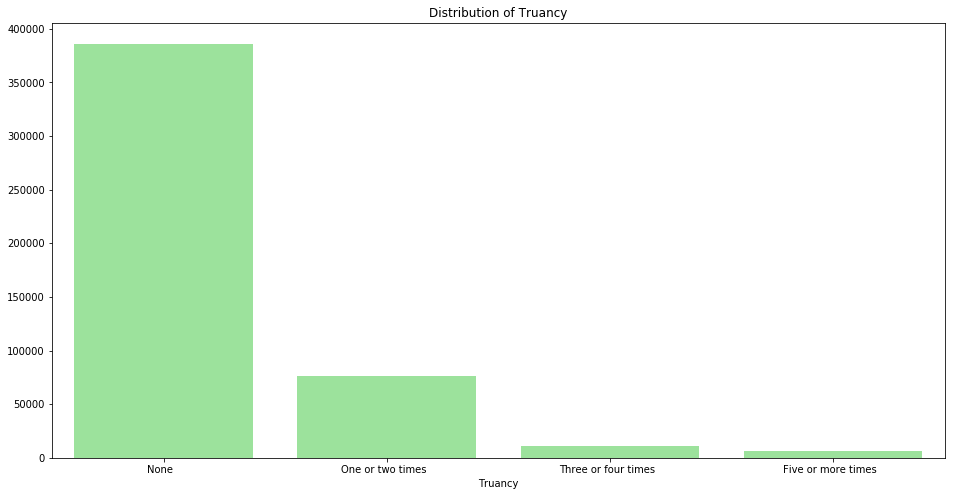

In [9]:
plt.figure(figsize=(16,8))
sb.countplot(data = df_full, x = 'ST09Q01', order = df_full['ST09Q01'].value_counts().index,
            color = 'lightgreen', )
plt.xlabel('Truancy')
plt.ylabel('')
plt.title('Distribution of Truancy');

**Analysis:**

By plotting the counts of each answer from the truancy question (ST09Q01) we can see that most children, almost 400,000 have never been late. At less than 50,000, there is also very little difference in the amount of children that have been late between 3 or 4 times and 5+ times. 

**What is the distribution of students have both parents living at home?**

In [10]:
df_full['ST11Q01'].value_counts()

Yes    433007
No      27552
Name: ST11Q01, dtype: int64

In [11]:
df_full['ST11Q01'].isnull().sum()

24931

In [12]:
df_full['ST11Q02'].value_counts();

In [13]:
df_full['ST11Q02'].isnull().sum()

44454

In [14]:
df_full_q2 = df_full.dropna(subset=['ST11Q02', 'ST11Q01'])

In [15]:
df_full_q2['ST11Q01'].isnull().sum()

0

In [16]:
df_full_q2['ST11Q01'] = pd.Series(np.where(df_full_q2.ST11Q01.values == 'Yes', 1, 0),
                        df_full_q2.index)

/Users/jackbolshaw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [17]:
df_full_q2['ST11Q02'] = pd.Series(np.where(df_full_q2.ST11Q02.values == 'Yes', 1, 0),
                        df_full_q2.index)

/Users/jackbolshaw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [18]:
df_full_q2['parents_at_home'] = df_full_q2['ST11Q01'] + df_full_q2['ST11Q02']

/Users/jackbolshaw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
df_full_q2.head()

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,...,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU,parents_at_home
0,1,Albania,80000,ALB0006,Non-OECD,Albania,1,1,10,1.0,...,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13,2
1,2,Albania,80000,ALB0006,Non-OECD,Albania,1,2,10,1.0,...,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13,2
2,3,Albania,80000,ALB0006,Non-OECD,Albania,1,3,9,1.0,...,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13,2
3,4,Albania,80000,ALB0006,Non-OECD,Albania,1,4,9,1.0,...,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13,2
4,5,Albania,80000,ALB0006,Non-OECD,Albania,1,5,9,1.0,...,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13,2


In [20]:
df_full_q2['parents_at_home'].value_counts()

2    360003
1     58264
0     18633
Name: parents_at_home, dtype: int64

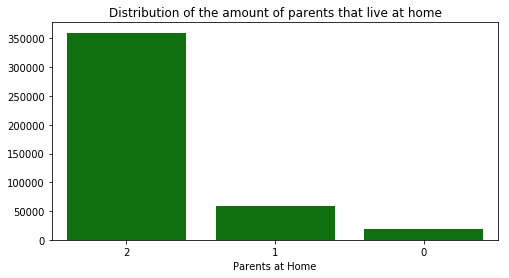

In [21]:
plt.figure(figsize=(8,4))
sb.countplot(data = df_full_q2, x = 'parents_at_home', order = df_full_q2['parents_at_home'].value_counts().index, color = 'green')

plt.xlabel('Parents at Home')
plt.ylabel('')
plt.title('Distribution of the amount of parents that live at home');

**Analysis:**

We can clearly see that the majority of students have both parents living at home. A much smaller amount of students have 1 parent living at home and having 0 parents at home is the least common. 

**Are students usually late for school?**

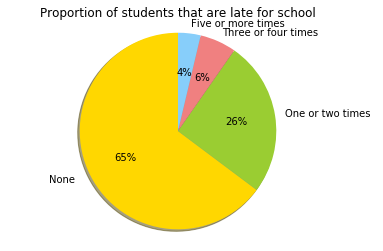

In [22]:
labels = df_full_q2['ST08Q01'].value_counts().index
sizes = df_full_q2['ST08Q01'].value_counts()
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.0, 0.0, 0.0, 0.0)  # explode 1st slice
 
# Plot
plt.title('Proportion of students that are late for school')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%0.0f%%', shadow=True, startangle=90, )

plt.axis('equal')
plt.show();

**Analysis:**

Similar to the first question we can see that almost two thirds of all children have never been late to school. Roughly a quarter of children have been late one of two times and 10 percent of children have been late more than twice. 

**Are the scores for maths, science and literacy unimodally distributed?**

In [23]:
df_full['PV1MATH'].value_counts();

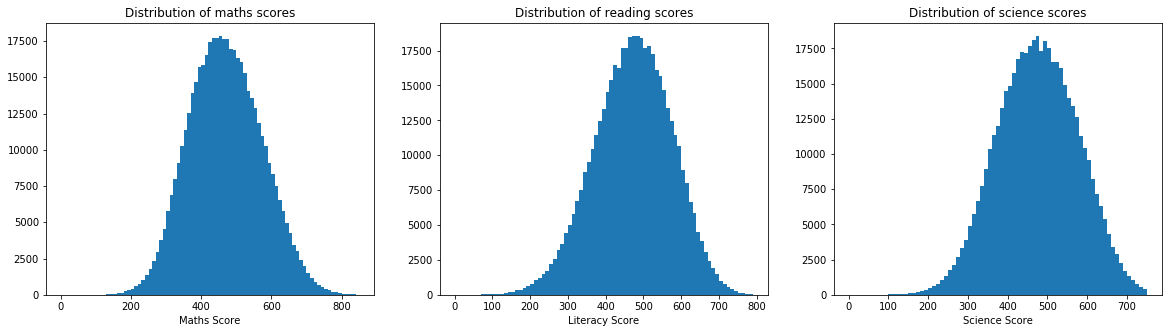

In [24]:
plt.figure(figsize = [20, 5])
base_color = sb.color_palette()[0]
plt.title('Distribution of scores')

# left plot: violin plot


plt.subplot(1, 3, 1)
bin_edges_1 = np.arange(0, df_sample['PV1MATH'].max()+50, 10)
plt.hist(data = df_full, x = 'PV1MATH', bins = bin_edges_1)
plt.xlabel('Maths Score')
plt.title('Distribution of maths scores')
;

# middle plot: box plot
plt.subplot(1, 3, 2)
bin_edges_2 = np.arange(0, df_sample['PV1READ'].max()+50, 10)
plt.hist(data = df_full, x = 'PV1READ', bins = bin_edges_2)
plt.xlabel('Literacy Score')
plt.title('Distribution of reading scores');

plt.subplot(1, 3, 3)
bin_edges_3 = np.arange(0, df_sample['PV1SCIE'].max()+10, 10)
plt.hist(data = df_full, x = 'PV1SCIE', bins = bin_edges_3)
plt.xlabel('Science Score')
plt.title('Distribution of science scores');

**Analysis:**

The distributions for the scores of maths, literacy and science are all unimodal. They all have maxima just below 500 approximataely and whilst maths and science scores show no real skew, the literacy scores seem to be slightly left skewed. 

### Bivariate Analysis

**Does the amount of parents at home affect a childs likeliness to be late to school?**

In [25]:
bar0_subset = df_full_q2.query('parents_at_home == 0')
bar1_subset = df_full_q2.query('parents_at_home == 1')
bar2_subset = df_full_q2.query('parents_at_home == 2')

In [26]:
bar0_percentages = bar0_subset['ST08Q01'].value_counts().div(len(bar0_subset['ST08Q01']))

In [27]:
bar1_percentages = bar1_subset['ST08Q01'].value_counts().div(len(bar1_subset['ST08Q01']))

In [28]:
bar2_percentages = bar2_subset['ST08Q01'].value_counts().div(len(bar2_subset['ST08Q01']))

In [29]:
bar_percentages = pd.concat([bar0_percentages, bar1_percentages, bar2_percentages], axis=1, sort=False)
bar_percentages.columns = ['0_parents', '1_parent', '2_parents']
bar_percentages

,0_parents,1_parent,2_parents
None,0.593195,0.581817,0.658195
One or two times,0.279289,0.284601,0.248256
Three or four times,0.068964,0.078127,0.056119
Five or more times,0.052541,0.051009,0.033886


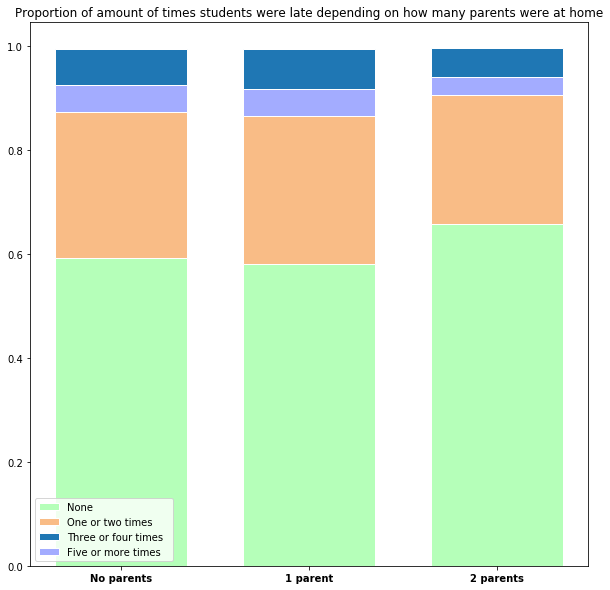

In [30]:
plt.figure(figsize=(10,10))
r = [0,1,2]
bars_1 = np.add(bar_percentages.iloc[0], bar_percentages.iloc[1]).tolist()
bars_2 = np.add(bar_percentages.iloc[3], bars_1).tolist()
names = ['No parents','1 parent','2 parents']
barWidth = 0.7
# Create green Bars
plt.bar(r, bar_percentages.iloc[0], color='#b5ffb9', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, bar_percentages.iloc[1], bottom=bar_percentages.iloc[0], color='#f9bc86', edgecolor='white', width=barWidth)
# Create purple Bars
plt.bar(r, bar_percentages.iloc[2], bottom=bars_2, edgecolor='white', width=barWidth)
# Create dark blue Bars
plt.bar(r, bar_percentages.iloc[3], bottom=bars_1, color='#a3acff', edgecolor='white', width=barWidth)

plt.xticks(r, names, fontweight='bold')
plt.legend(bar_percentages.index)
plt.title('Proportion of amount of times students were late depending on how many parents were at home')
# Show graphic
plt.show();

**Analysis:**

Children having two parents at home had the best truancy rate. Above 60% of children, with both parents at home, have never been late to school. Children with one parent living at home had the worst truancy rate with more than 40% being late at least once. Children with no parents at home had a very similar truancy distribution to those with 1 parent at home. 

**Does the presence of parents affect the math, science and reading scores?**

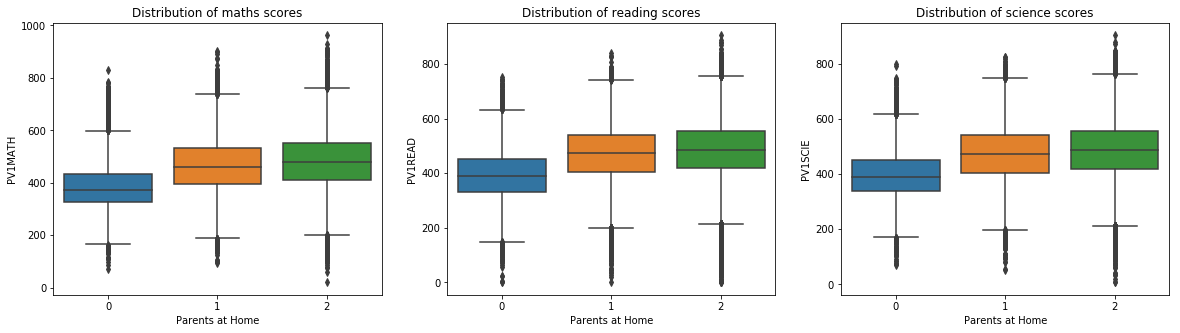

In [31]:
plt.figure(figsize = [20, 5])
base_color = sb.color_palette()[0]
plt.title('Distribution of scores')

# left plot: violin plot
plt.subplot(1, 3, 1)
ax = sb.boxplot(x='parents_at_home', y='PV1MATH', data=df_full_q2)
plt.xlabel('Parents at Home')
plt.title('Distribution of maths scores');

# middle plot: box plot
plt.subplot(1, 3, 2)
ax = sb.boxplot(x='parents_at_home', y='PV1READ', data=df_full_q2)
plt.xlabel('Parents at Home')
plt.title('Distribution of reading scores');

plt.subplot(1, 3, 3)
ax = sb.boxplot(x='parents_at_home', y='PV1SCIE', data=df_full_q2)
plt.xlabel('Parents at Home')
plt.title('Distribution of science scores');

**Analysis:**

From the three box plot we can see that having 2 parents at home has a positive affect on the average scores for mathematics (PV1MATH), science (PV1SCIE) and reading (PV1READ. Not having any parents at home had a detrimentral affect on the mean scores for all subjects but also children with no parents at home had the smallest range. On the contrary, parents with both parents at home had the largest range. 

**Do children, who are never late, score higher in mathematics?**

In [32]:
df_full['ST09Q01'].value_counts()

None                     385998
One or two times          75969
Three or four times       10882
Five or more times         6282
Name: ST09Q01, dtype: int64

In [33]:
never_late = df_full['ST09Q01'].value_counts().index[:1]
late = df_full['ST09Q01'].value_counts().index[1:4]
df_late = df_full.loc[df_full['ST09Q01'].isin(late)]
df_never_late = df_full.loc[df_full['ST09Q01'].isin(never_late)]

/Users/jackbolshaw/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Users/jackbolshaw/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


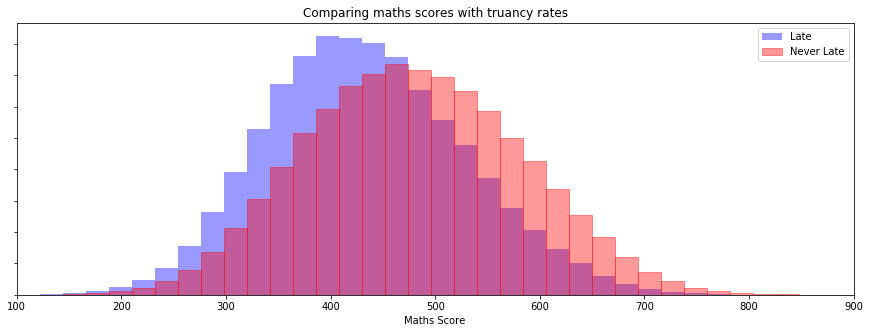

In [34]:
fig = plt.figure(figsize = [15, 5])
ax = fig.add_subplot(111)

ax.hist(data = df_late, x = df_late['PV1MATH'], bins = np.arange(100, 1000, 22), normed=True, edgecolor='None', alpha = 0.4, color= 'b')
ax.hist(data = df_never_late, x = df_never_late['PV1MATH'], bins = np.arange(100, 1000, 22), normed=True, edgecolor='r', alpha = 0.4, color= 'r')
ax.legend(['Late', 'Never Late'])
ax.set_yticklabels([])
plt.xlim((100, 900))
plt.title('Comparing maths scores with truancy rates')
plt.xlabel('Maths Score')
plt.show();


**Analysis:**

Children who are never late to school seem to have normally distributed mathematics scores. Children who have been late to school once or more have unimodally distributed mathematics scores but appear to have a slight right skew, beause of this skew, children who are never late have a higher average mathematics score than children who are late.

**Are children with siblings more or less likely to score higher?**

In [35]:
df_full['ST11Q03'].value_counts()

Yes    245262
No     154814
Name: ST11Q03, dtype: int64

In [36]:
df_full['ST11Q04'].value_counts()

Yes    223061
No     167707
Name: ST11Q04, dtype: int64

In [37]:
df_full.shape[0]

485490

In [38]:
siblings = []

for i in range(df_full.shape[0]):
    if df_full['ST11Q03'][i] == "Yes":
        siblings.append(1)
    elif df_full['ST11Q04'][i] == "Yes":
        siblings.append(1)
    else: 
        siblings.append(0)

In [39]:
df_full['siblings'] = siblings

In [40]:
siblings = ['1']
nosiblings = ['0']
df_w_siblings = df_full.loc[df_full['siblings'].isin(siblings)]
df_wo_siblings = df_full.loc[df_full['siblings'].isin(nosiblings)]

/Users/jackbolshaw/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Users/jackbolshaw/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


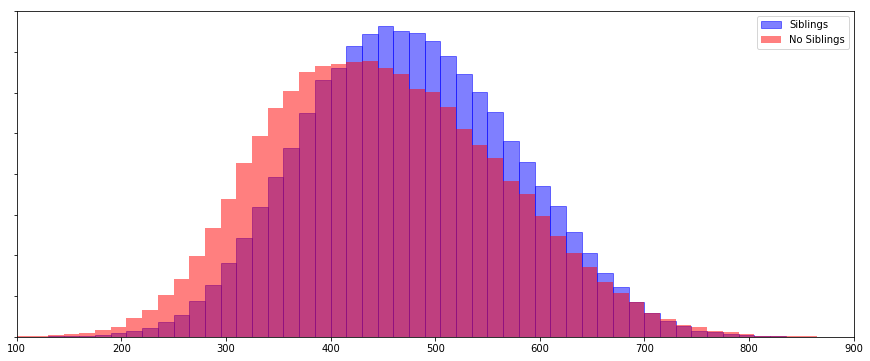

In [41]:
fig = plt.figure(figsize = [15, 6])

ax = fig.add_subplot(111)
ax.hist(data = df_w_siblings, x = df_w_siblings['PV1MATH'], bins = np.arange(100, 1000, 15), normed=True, edgecolor='b', alpha = 0.5, color= 'b')
ax.hist(data = df_wo_siblings, x = df_wo_siblings['PV1MATH'], bins = np.arange(100, 1000, 15), normed=True, edgecolor='None', alpha = 0.5, color= 'r')
ax.set_yticklabels([])
plt.xlim((100, 900))
ax.legend(['Siblings', 'No Siblings'])
plt.show();

**Analysis:**

Similar to the affect trauncy rate has on mathematical ability, having siblings makes a similar difference. Children with at least 1 siblings have a higher average than those children without siblings. Both distributions seem to have similar maximums and minimums. 

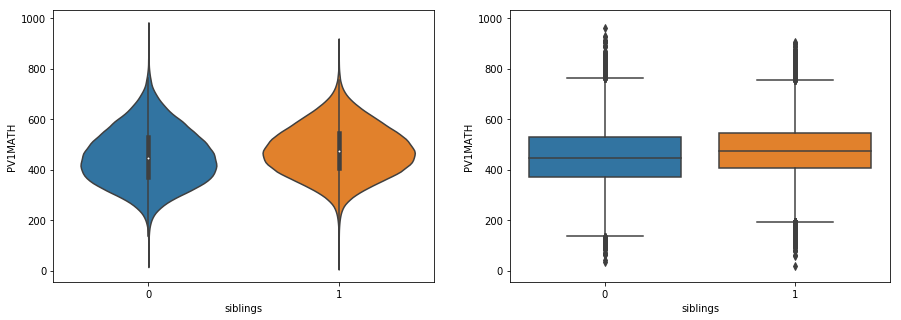

In [42]:
plt.figure(figsize = [15, 5])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = df_full, x = df_full['siblings'], y = 'PV1MATH')

# center plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = df_full, x = df_full['siblings'], y = 'PV1MATH')
plt.ylim(ax1.get_ylim()); # set y-axis limits to be same as left plot

**Is there a relationship between Mathematics Scores and Reading Scores?**

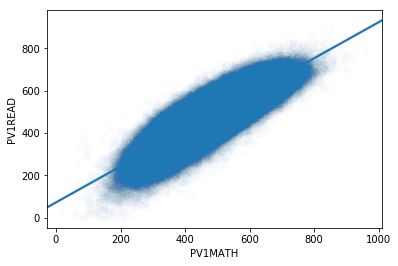

In [43]:
sb.regplot(data = df_full, x = 'PV1MATH', y = 'PV1READ', 
           x_jitter = 0.2, y_jitter = 0.2, 
           scatter_kws = {'alpha' : 1/100});

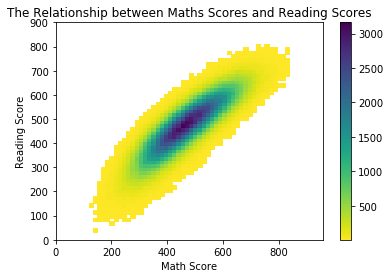

In [44]:
bin_PV1MATH = np.arange(0, df_full['PV1MATH'].max(), 15)
bin_PV2READ   = np.arange(0, df_full['PV1READ'].max(), 15)

h2d = plt.hist2d(data = df_full, x = 'PV1MATH', y = 'PV1READ', 
          bins = [bin_PV1MATH, bin_PV2READ], cmap = 'viridis_r', cmin = 5, alpha = 0.99)
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.title('The Relationship between Maths Scores and Reading Scores')
plt.colorbar()
counts = h2d[0]

**Analysis:**

There is a strong relationship between mathematical ability and reading ability. The relationship is also positive. The majority of scores, represented by the darker area of the graph, lies very centrally in the distribution with mathematic scores between 400 and 500 and similar reading scores. At the top end of the major part of the spectrum there are children with maths and reading scores of 800.

### Multivariate Analysis

**What, if any, does the influence of having both parents living at home appear to have on reading ability and mathematical ability?**

''

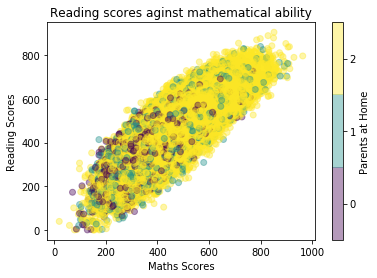

In [45]:
plt.scatter(data = df_full_q2, x = 'PV1MATH', y = 'PV1READ', c = 'parents_at_home', cmap=plt.cm.get_cmap('viridis', 3), alpha = 0.4)
plt.title('Reading scores aginst mathematical ability')
plt.ylabel('Reading Scores')
plt.xlabel('Maths Scores')
plt.colorbar(ticks=range(3), label='Parents at Home')
plt.clim(-0.5, 2.5)
;

**Analysis:**

From the bivariate analysis we found that there is a strong positive correlation between reading scores and mathematical ability. Adding in the amount of parents at home as a colour dependent variable shows that the children with no parents at home, represented by the darker circles, appear to clump in the bottom left portion of the distribution which corresponds to lower readings and mathematics scores. The top end of the spectrum is made up mainly children with two parents. 

**Does the presence of having both parents living at home create a difference in mathematical ability and literacy ability? Does this difference appear to increase or decrease if both parents are not living at home?**

In [46]:
df_full_q2['MATH_READ_diff'] = df_full_q2['PV1MATH'] - df_full_q2['PV1READ']
df_full_q2['MATH_SCIE_diff'] = df_full_q2['PV1MATH'] - df_full_q2['PV1SCIE']
df_full_q2['SCIE_READ_diff'] = df_full_q2['PV1SCIE'] - df_full_q2['PV1READ']

/Users/jackbolshaw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/jackbolshaw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/jackbolshaw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

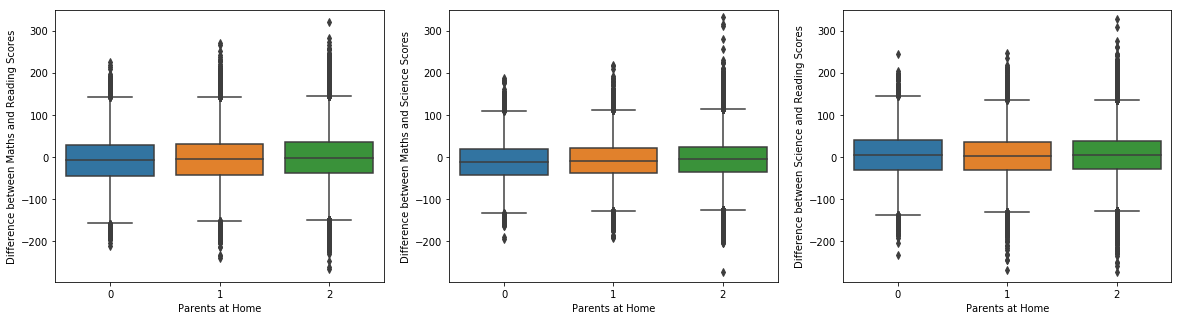

In [47]:
plt.figure(figsize = [20, 5])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 3, 1)
ax1 = sb.boxplot( x = "parents_at_home", y = "MATH_READ_diff", data=df_full_q2)
plt.xlabel('Parents at Home')
plt.ylabel('Difference between Maths and Reading Scores')

# center plot: box plot
plt.subplot(1, 3, 2)
sb.boxplot( x = "parents_at_home", y = "MATH_SCIE_diff", data=df_full_q2)
plt.ylim(ax1.get_ylim())
plt.xlabel('Parents at Home')
plt.ylabel('Difference between Maths and Science Scores')

plt.subplot(1, 3, 3)
sb.boxplot( x = "parents_at_home", y = "SCIE_READ_diff", data=df_full_q2)
plt.ylim(ax1.get_ylim())
plt.xlabel('Parents at Home')
plt.ylabel('Difference between Science and Reading Scores');

**Analysis:**

The overall differences between between subjects does not seem to differ between the amount of parents that are living at home. However the range of differences is largest in households that have 2 parents at home.  

**What is the relationship between literacy scores and mathematical abilities between genders?**

In [48]:
import statsmodels.api as sm

In [49]:
X_boy = df_full_q2[df_full_q2['ST04Q01'] == 'Male']['PV1MATH']
Y_boy = df_full_q2[df_full_q2['ST04Q01'] == 'Male']['PV1READ']

results_boy = sm.OLS(Y_boy,sm.add_constant(X_boy)).fit()
results_boy.summary()

/Users/jackbolshaw/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                PV1READ   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                 7.835e+05
Date:                Fri, 22 Mar 2019   Prob (F-statistic):               0.00
Time:                        17:09:03   Log-Likelihood:            -1.1420e+06
No. Observations:              216089   AIC:                         2.284e+06
Df Residuals:                  216087   BIC:                         2.284e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.5932      0.487     81.370      0.000      38.640      40.547
PV1MATH        0.8729      0.001    885.156      0.000       0.871       0.875
==============================================================================
Omnibus:                     1388.373   Durbin-Watson:                   1.517
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1639.750
Skew:                          -0.137   Prob(JB):                         0.00
Kurtosis:                       3.326   Cond. No.                     2.34e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
X_girl = df_full_q2[df_full_q2['ST04Q01'] == 'Female']['PV1MATH']
Y_girl = df_full_q2[df_full_q2['ST04Q01'] == 'Female']['PV1READ']

results_girl = sm.OLS(Y_girl,sm.add_constant(X_girl)).fit()
results_girl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                PV1READ   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                 6.912e+05
Date:                Fri, 22 Mar 2019   Prob (F-statistic):               0.00
Time:                        17:11:36   Log-Likelihood:            -1.1612e+06
No. Observations:              220811   AIC:                         2.322e+06
Df Residuals:                  220809   BIC:                         2.322e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        103.4833      0.481    215.150      0.000     102.541     104.426
PV1MATH        0.8330      0.001    831.401      0.000       0.831       0.835
==============================================================================
Omnibus:                     1973.412   Durbin-Watson:                   1.502
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2490.469
Skew:                          -0.152   Prob(JB):                         0.00
Kurtosis:                       3.422   Cond. No.                     2.33e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
results_boy.params[1]

0.8728637829624247

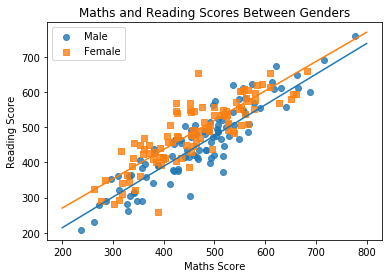

In [52]:
gender_markers = [["Male", 'o'],
                 ["Female", 's']]

for sex, gender in gender_markers:
    df_full_plot = df_full_q2[df_full_q2['ST04Q01'] == sex]
    X_plot = plt.scatter(data = df_full_plot.sample(n=100), y = 'PV1READ', x = 'PV1MATH', marker = gender, alpha = 0.8)
plt.legend(['Male','Female'])
plt.plot([200, 800], [214.1732, 737.9132])
plt.plot([200, 800], [270.0833, 769.8833])
plt.xlabel('Maths Score')
plt.ylabel('Reading Score')
plt.title('Maths and Reading Scores Between Genders');



**Analysis:**

From the sample of 100 children, it is clear that given a mathematical ability, girls score higher on average in reading. The two fitted regression lines are comparable in that for both boys and girls as mathematical ability increases so does the reading score. At lower scores however the difference between genders is higher. As both mathematical and reading ability increases the difference between genders becomes smaller. In this random sample both the highest mathematical and reading scores are both held by girls. 

### Conclusion

If I were to suggest a plan of action to raise the most acedemically successful children, I would suggest both parents to live at home, have multiple children, never be late and have more girls than boys. However these generalisations mean nothing to the individual family and are simply not practical in many situations. 



